# Exercise

1) perform simple linear regression on Indian_housing_pune dataset between house size and price columns 

2) Perform multiple linear regression on advertising dataset between house size and price columns


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('Indian_housing_Pune_data.csv')
df

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
0,2 BHK Apartment,906 sq ft,Lohegaon,Pune,18.605820,73.912407,12000,INR,2.0,NaN,NaN,NaN,Posted 3 years ago,A spacious 2 bhk multistorey apartment is avai...,No Deposit,Unfurnished
1,1 BHK Apartment,650 sq ft,Anand Nagar,Pune,18.474377,73.820549,11000,INR,1.0,NaN,NaN,NaN,Posted 2 years ago,It has a built-up area of 650 sqft and is avai...,No Deposit,Semi-Furnished
2,1 RK Studio Apartment,350 sq ft,Wagholi,Pune,18.580336,73.980507,4500,INR,1.0,NaN,NaN,NaN,Posted 2 years ago,This spacious 1 rk independent house is availa...,No Deposit,Unfurnished
3,3 BHK Apartment,"1,500 sq ft",Sangamvadi,Pune,18.541786,73.882454,35000,INR,2.0,NaN,NaN,NaN,Posted 3 years ago,"Furnishings include 1 tv, 1 refrigerator, 1 so...",No Deposit,Furnished
4,5 BHK Independent House,"5,000 sq ft",Wadgaon Sheri,Pune,18.560164,73.924927,110000,INR,5.0,NaN,NaN,NaN,Posted 3 years ago,Itâs a 5 bhk independent house situated in W...,No Deposit,Unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1 BHK Apartment,655 sq ft,Wakad,Pune,18.603699,73.761238,12500,INR,1.0,NaN,NaN,NaN,Posted 3 years ago,Well designed 1 bhk multistorey apartment is a...,"36,000",Unfurnished
3906,2 BHK Apartment,920 sq ft,Pimple Saudagar,Pune,18.594870,73.798187,16000,INR,2.0,NaN,NaN,NaN,Posted 3 years ago,Itâs a 2 bhk multistorey apartment situated ...,"50,000",Unfurnished
3907,1 BHK Apartment,650 sq ft,Pimple Saudagar,Pune,18.595701,73.797890,16000,INR,1.0,1.0,NaN,NaN,Posted 3 years ago,A spacious 1 bhk multistorey apartment is avai...,"35,000",Furnished
3908,2 BHK Apartment,"1,200 sq ft",Pimple Saudagar,Pune,18.592476,73.798538,20000,INR,2.0,NaN,NaN,NaN,Posted 3 years ago,It has a built-up area of 1200 sqft and is ava...,"60,000",Furnished


In [3]:
#Extract numbers using regex
df['house_size'] = df['house_size'].str.extract(r'(\d+)').astype(int)

In [7]:
df['house_size'].dtype

dtype('int32')

In [12]:
#Extract relevant columns
X = df[['house_size']].values   #Predictor
y = df['price'].values


In [14]:
#Split dataset in to training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2 , random_state=42)


In [24]:
#Fit the linear regression model
model = LinearRegression()
y_pred = model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

In [26]:
#Metrics and Interpretation
mse = mean_squared_error(Y_test,y_pred)
rmse = np.sqrt(mse)
r2 =r2_score(Y_test,y_pred)

In [28]:
print("model Coefficients")
print(f" Slope (Coefficient for Carat):  {model.coef_[0]}")
print(f" Intercept : {model.intercept_}")
print(f"\nModel Performance Metrics")
print(f" Mean Squared Error (MSE) {mse}")
print(f"Root  Mean Squared Error (RMSE) {rmse}")
print(f"R^2  Score (Explained Variance) : {r2}")

model Coefficients
 Slope (Coefficient for Carat):  -15.776234339461434
 Intercept : 28489.280288608956

Model Performance Metrics
 Mean Squared Error (MSE) 216772365.04454497
Root  Mean Squared Error (RMSE) 14723.191401477636
R^2  Score (Explained Variance) : 0.13957168535671038


In [32]:
#Print predicted vs actual values for the test set
print("\nPredicted vs actual prices (Test set):")
for actual,predicted in zip(Y_test,y_pred):
    print(f" Actual : {actual:.2f} , Predicted : {predicted:.2f}")


Predicted vs actual prices (Test set):
 Actual : 17000.00 , Predicted : 28473.50
 Actual : 12500.00 , Predicted : 17445.92
 Actual : 45000.00 , Predicted : 28473.50
 Actual : 13000.00 , Predicted : 17761.44
 Actual : 9000.00 , Predicted : 17729.89
 Actual : 23000.00 , Predicted : 28473.50
 Actual : 22000.00 , Predicted : 28473.50
 Actual : 27000.00 , Predicted : 28473.50
 Actual : 100000.00 , Predicted : 28457.73
 Actual : 25000.00 , Predicted : 28473.50
 Actual : 20000.00 , Predicted : 13912.04
 Actual : 25000.00 , Predicted : 28473.50
 Actual : 7000.00 , Predicted : 14290.67
 Actual : 15000.00 , Predicted : 17603.68
 Actual : 29000.00 , Predicted : 28473.50
 Actual : 25000.00 , Predicted : 15079.48
 Actual : 13000.00 , Predicted : 20601.16
 Actual : 75000.00 , Predicted : 28457.73
 Actual : 15000.00 , Predicted : 28473.50
 Actual : 16000.00 , Predicted : 17761.44
 Actual : 22000.00 , Predicted : 19812.35
 Actual : 13000.00 , Predicted : 19528.38
 Actual : 27000.00 , Predicted : 1949

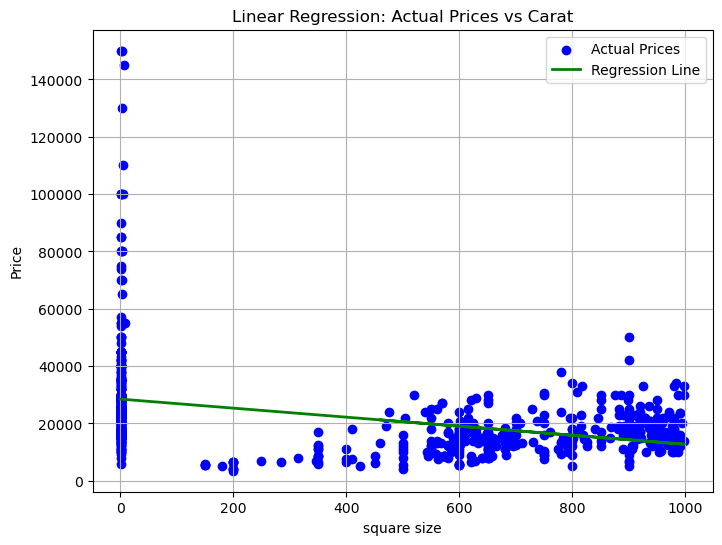

In [36]:
plt.figure(figsize=(8,6))
plt.scatter(X_test,Y_test,color='blue',label='Actual Prices')
plt.plot(X_test,y_pred,color='green',linewidth=2,label="Regression Line")
plt.xlabel("square size")
plt.ylabel("Price")
plt.title("Linear Regression: Actual Prices vs Carat")
plt.legend()
plt.grid()